In [123]:
import cmocean
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

datadir = "../data/"
figdir = "../figures/"

In [124]:
ds_ease = xr.open_dataset(datadir + "ds_aviso.nc")
ds_ease

<xarray.Dataset> Size: 2GB
Dimensions:  (y: 264, x: 264, time: 1338)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2011-01-03 2011-01-06 ... 2021-12-30
    lat      (y, x) float32 279kB ...
    lon      (y, x) float32 279kB ...
Dimensions without coordinates: y, x
Data variables:
    sla      (y, x, time) float32 373MB ...
    adt      (y, x, time) float32 373MB ...
    ugos     (y, x, time) float32 373MB ...
    vgos     (y, x, time) float32 373MB ...
    ugosa    (y, x, time) float32 373MB ...
    vgosa    (y, x, time) float32 373MB ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2011-01-03 00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2011-01-03 00:00:00Z
    title:                           DT merged all satellites Arctic Ocean Gr...

In [133]:
dataname = "mean_dynamic_topography_cnes"
ds_latlon = xr.open_dataset(datadir + f"{dataname}.nc")
ds_latlon

<xarray.Dataset> Size: 33MB
Dimensions:  (lat: 240, lon: 2880)
Coordinates:
  * lon      (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat      (lat) float32 960B 60.06 60.19 60.31 60.44 ... 89.69 89.81 89.94
Data variables:
    mdt      (lat, lon) float64 6MB ...
    u        (lat, lon) float64 6MB ...
    v        (lat, lon) float64 6MB ...
    err_mdt  (lat, lon) float64 6MB ...
    err_u    (lat, lon) float64 6MB ...
    err_v    (lat, lon) float64 6MB ...
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

In [134]:
ds_xy = ds_latlon.interp(lat=ds_ease.lat, lon=ds_ease.lon)
ds_xy

<xarray.Dataset> Size: 4MB
Dimensions:  (y: 264, x: 264)
Coordinates:
    lat      (y, x) float32 279kB 47.33 47.5 47.67 47.84 ... 47.67 47.5 47.33
    lon      (y, x) float32 279kB -45.0 -44.78 -44.56 ... 135.4 135.2 135.0
Dimensions without coordinates: y, x
Data variables:
    mdt      (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    u        (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    v        (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    err_mdt  (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    err_u    (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
    err_v    (y, x) float64 558kB nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

In [135]:
ds_xy.coords["x"] = np.arange(len(ds_xy.x))
ds_xy.coords["y"] = np.arange(len(ds_xy.y))

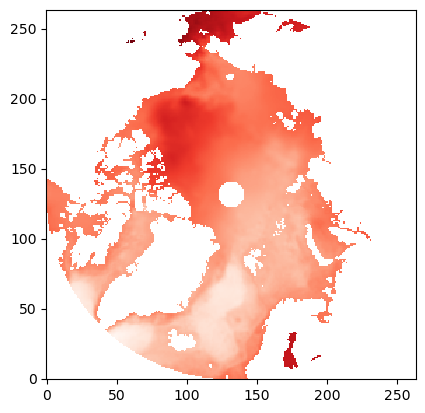

In [136]:
fig, ax = plt.subplots()
cm = ax.pcolormesh(ds_xy.x, ds_xy.y, ds_xy.mdt, cmap="Reds")
ax.set_aspect("equal")

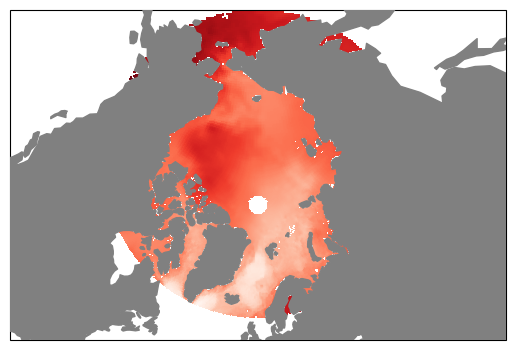

In [137]:
fig, ax = plt.subplots(subplot_kw={"projection" : ccrs.Stereographic()})

c = ax.pcolormesh(ds_xy.lon, ds_xy.lat, ds_xy.mdt,
                  cmap="Reds",
                  transform=ccrs.PlateCarree()
                  )
ax.add_feature(cfeature.LAND, color="grey", zorder=100)
ax.set_aspect("equal")

In [138]:
ds_xy.to_netcdf(datadir + dataname + "_ease.nc")